In [ ]:
import numpy as np
import pandas as pd
import io
import re
import matplotlib.pyplot as plt

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


# 말뭉치 자연어처리

In [ ]:
data = pd.read_excel("Valuation_corpus.xlsx",engine = "openpyxl")

In [ ]:
corpus = data[['Corpus']]

In [ ]:
k = 0

for i in corpus["Corpus"]:
  text = re.compile("[ㄱ-ㅎ|\d\ㅏ-ㅣ|가-힣]+").findall(str(i))
  corpus.loc[k,"Corpus"] = " ".join(text).strip()
  k+=1

In [ ]:
print(len(corpus))
drop_index = corpus[corpus['Corpus'] == ""].index
corpus = corpus.drop(drop_index)
print(len(corpus))

8397
8393


In [ ]:
! pip install konlpy
from konlpy.tag import Hannanum, Kkma, Komoran, Mecab, Okt

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 86 kB 5.0 MB/s 
     |████████████████████████████████| 448 kB 43.9 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()

def tokenizer(row):
  return hannanum.morphs(row)

In [ ]:
corpus["rev_token"] = corpus["Corpus"].apply(tokenizer)
corpus

,Corpus,rev_token
0,삼성전자가 리움미술관과 파트너십을 체결하고 라이프스타일 더 프레임 을 통해 국내 고...,"[삼성전자, 가, 리움미술관, 과, 파트너십, 을, 체결, 하고, 라이프스타, 이,..."
1,종목별로는 주성엔지니어링 세미콘 심텍 하나마이크론 등 중소형주 약진이 돋보였고 하이...,"[종목별, 로는, 주성엔지니어링, 세미콘, 심텍, 하나마이크론, 등, 중소형주, 약..."
2,삼성전자가 로봇사업팀을 꾸려 미래 신수종 사업으로 키운다 그동안 시제품으로 선보였던...,"[삼성전자, 가, 로봇사업팀, 을, 꾸리, 어, 미래, 신수종, 사업, 으로, 키우..."
3,고객 경험 중심의 사업가치 전사 차원의 시너지 강조 삼성전자가 통합 세트 부문의 명...,"[고객, 경험, 중심, 의, 사업가치, 전사, 차원, 의, 시너지, 강조, 삼성전자..."
4,8월에는 삼성전자와 디지털금융 혁신 생태계 조성을 위한 업무협약 을 체결했다 이를 ...,"[8월, 에는, 삼성전자, 와, 디지털금융, 혁신, 생태계, 조성, 을, 위하, ㄴ..."
...,...,...
8392,해운업계 온실가스 배출 등 환경 규제 넘게 적극 도와야죠,"[해운업계, 온실가스, 배출, 등, 환경, 규제, 넘, 게, 적극, 돕, 어야죠]"
8393,일단 코로나 넘자 기업들 등 사업재편 줄줄이 연기 우려,"[일단, 코, 로나, 넘, 자, 기업들, 등, 사업재편, 주, ㄹ, 줄, 이, 연기..."
8394,이주의 주식시장은 오미크론 코로나19 확산 속 관련주들 강세 두산중공업 폭락 관련주...,"[이주, 의, 주식시장, 은, 오미크론, 코로나19, 확산, 속, 관련주들, 강세,..."
8395,한국 탈출은 지능순 삼성전자 팔아 테슬라 샀더니 박의명의 불개미 구조대,"[한국, 탈출, 은, 지능순, 삼성전자, 팔, 아, 테슬라, 사, 아니, 박의명, ..."


In [ ]:
print("최대 토큰 개수: ", (max(len(i) for i in corpus['rev_token'])))
print("평균 토큰 개수: ", sum(map(len, corpus['rev_token'])) / len(corpus['rev_token']))

최대 토큰 개수:  71
평균 토큰 개수:  26.752174431073513


In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = corpus['rev_token'], size=32, window = 7, min_count = 0, workers = 100, sg =1)

In [ ]:
model.wv.vectors.shape

(16619, 32)

In [ ]:
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [ ]:
print(word_vectors.similarity(w1='삼성전자',w2='삼성전자'))

1.0


# 기업별 코사인 유사도

In [ ]:
company_similarity = []

In [ ]:
for i in ["삼성전자","하이닉스","네이버","삼성바이오로직스","삼성전자우","카카오","화학","006400","현대차","기아","카카오뱅크","셀트리온","카카오페이","포스코","105560","크래프톤","현대모비스","삼성물산","066570","096770","055550","바이오사이언스","에스케이","생활건강", "엔씨소프트","하이브","한국전력","삼성생명","에이치엠엠"]:
  for k in ["삼성전자","하이닉스","네이버","삼성바이오로직스","삼성전자우","카카오","화학","006400","현대차","기아","카카오뱅크","셀트리온","카카오페이","포스코","105560","크래프톤","현대모비스","삼성물산","066570","096770","055550","바이오사이언스","에스케이","생활건강", "엔씨소프트","하이브","한국전력","삼성생명","에이치엠엠"]:
    print(i+"와",k+"의 유사도: ",word_vectors.similarity(w1=i,w2=k))
    company_similarity.append(word_vectors.similarity(w1=i,w2=k))

삼성전자와 삼성전자의 유사도:  1.0
삼성전자와 하이닉스의 유사도:  0.7939813
삼성전자와 네이버의 유사도:  0.619167
삼성전자와 삼성바이오로직스의 유사도:  0.61420035
삼성전자와 삼성전자우의 유사도:  0.6178187
삼성전자와 카카오의 유사도:  0.5537029
삼성전자와 화학의 유사도:  0.4898474
삼성전자와 006400의 유사도:  0.63578856
삼성전자와 현대차의 유사도:  0.6724087
삼성전자와 기아의 유사도:  0.5023843
삼성전자와 카카오뱅크의 유사도:  0.48528314
삼성전자와 셀트리온의 유사도:  0.52584493
삼성전자와 카카오페이의 유사도:  0.59288806
삼성전자와 포스코의 유사도:  0.32940453
삼성전자와 105560의 유사도:  0.55414456
삼성전자와 크래프톤의 유사도:  0.47113067
삼성전자와 현대모비스의 유사도:  0.37170357
삼성전자와 삼성물산의 유사도:  0.47368595
삼성전자와 066570의 유사도:  0.5653527
삼성전자와 096770의 유사도:  0.6715795
삼성전자와 055550의 유사도:  0.4851548
삼성전자와 바이오사이언스의 유사도:  0.3670644
삼성전자와 에스케이의 유사도:  0.58497846
삼성전자와 생활건강의 유사도:  0.36289448
삼성전자와 엔씨소프트의 유사도:  0.39075857
삼성전자와 하이브의 유사도:  0.34723023
삼성전자와 한국전력의 유사도:  0.45154667
삼성전자와 삼성생명의 유사도:  0.63653755
삼성전자와 에이치엠엠의 유사도:  0.5444672
하이닉스와 삼성전자의 유사도:  0.7939813
하이닉스와 하이닉스의 유사도:  1.0
하이닉스와 네이버의 유사도:  0.6515703
하이닉스와 삼성바이오로직스의 유사도:  0.7544352
하이닉스와 삼성전자우의 유사도:  0.8521825
하이닉스와 카카오의 유사도:  0.6095115


In [ ]:
company_similarity[0:29]

[1.0,
 0.7939813,
 0.619167,
 0.61420035,
 0.6178187,
 0.5537029,
 0.4898474,
 0.63578856,
 0.6724087,
 0.5023843,
 0.48528314,
 0.52584493,
 0.59288806,
 0.32940453,
 0.55414456,
 0.47113067,
 0.37170357,
 0.47368595,
 0.5653527,
 0.6715795,
 0.4851548,
 0.3670644,
 0.58497846,
 0.36289448,
 0.39075857,
 0.34723023,
 0.45154667,
 0.63653755,
 0.5444672]

In [ ]:
company_similar_frame = []

In [ ]:
company_similar_frame = pd.DataFrame(company_similar_frame)

In [ ]:
company_similar_frame

""


In [ ]:
company_name = ["삼성전자","SK하이닉스","네이버","삼성바이오로직스","삼성전자우","카카오","LG화학","삼성SDI","현대차","기아","카카오뱅크","셀트리온","카카오페이","포스코","KB금융","크래프톤","현대모비스","삼성물산","LG전자","SK이노베이션","신한지주","SK바이오사이언스","SK","LG생활건강", "엔씨소프트","하이브","한국전력","삼성생명","HMM"]

In [ ]:
k = 0

for i in range(0,841,29):
  company_similar_frame.insert(k,company_name[k],company_similarity[i:i+29],True)
  k = k + 1

In [ ]:
company_similar_frame.insert(0,"회사명",company_name,True)

In [ ]:
company_similar_frame 

,회사명,삼성전자,SK하이닉스,네이버,삼성바이오로직스,삼성전자우,카카오,LG화학,삼성SDI,현대차,기아,카카오뱅크,셀트리온,카카오페이,포스코,KB금융,크래프톤,현대모비스,삼성물산,LG전자,SK이노베이션,신한지주,SK바이오사이언스,SK,LG생활건강,엔씨소프트,하이브,한국전력,삼성생명,HMM
0,삼성전자,1.000000,0.793981,0.619167,0.614200,0.617819,0.553703,0.489847,0.635789,0.672409,0.502384,0.485283,0.525845,0.592888,0.329405,0.554145,0.471131,0.371704,0.473686,0.565353,0.671579,0.485155,0.367064,0.584978,0.362894,0.390759,0.347230,0.451547,0.636538,0.544467
1,SK하이닉스,0.793981,1.000000,0.651570,0.754435,0.852183,0.609511,0.646516,0.802358,0.625486,0.573312,0.700909,0.650579,0.672218,0.391727,0.678882,0.562656,0.359004,0.453279,0.656961,0.808521,0.660672,0.585721,0.710827,0.507204,0.578603,0.568729,0.410395,0.766647,0.612159
2,네이버,0.619167,0.651570,1.000000,0.741158,0.675309,0.840042,0.563454,0.577850,0.514105,0.482579,0.512963,0.602539,0.447623,0.221595,0.528652,0.519341,0.351588,0.414252,0.507569,0.501090,0.501016,0.357381,0.524863,0.219816,0.575692,0.537130,0.392214,0.541313,0.415484
3,삼성바이오로직스,0.614200,0.754435,0.741158,1.000000,0.837527,0.681074,0.803728,0.810350,0.671379,0.650322,0.691804,0.793090,0.552306,0.352069,0.769725,0.491749,0.397881,0.677388,0.638456,0.751309,0.654590,0.737240,0.702824,0.562894,0.519053,0.643596,0.570840,0.753348,0.594719
4,삼성전자우,0.617819,0.852183,0.675309,0.837527,1.000000,0.726413,0.798383,0.940613,0.755680,0.739243,0.752270,0.709792,0.734714,0.583744,0.856528,0.591182,0.525800,0.530683,0.691854,0.817007,0.747159,0.645266,0.788673,0.503820,0.607361,0.674923,0.565296,0.828960,0.640619
5,카카오,0.553703,0.609511,0.840042,0.681074,0.726413,1.000000,0.568588,0.657357,0.667426,0.629219,0.569592,0.501222,0.557458,0.310350,0.602996,0.573807,0.524226,0.451580,0.482521,0.499089,0.534418,0.351830,0.539900,0.296515,0.554193,0.568144,0.421980,0.557185,0.426198
6,LG화학,0.489847,0.646516,0.563454,0.803728,0.798383,0.568588,1.000000,0.791204,0.680130,0.649747,0.614771,0.672911,0.451368,0.586703,0.666292,0.415767,0.343696,0.547186,0.736682,0.838510,0.552268,0.638963,0.774973,0.522250,0.383608,0.541514,0.440470,0.683072,0.501392
7,삼성SDI,0.635789,0.802358,0.577850,0.810350,0.940613,0.657357,0.791204,1.000000,0.840720,0.819138,0.723700,0.628059,0.645817,0.614568,0.916909,0.466373,0.540768,0.633766,0.713781,0.870673,0.719891,0.598546,0.819004,0.515983,0.490441,0.625952,0.627376,0.823721,0.666162
8,현대차,0.672409,0.625486,0.514105,0.671379,0.755680,0.667426,0.680130,0.840720,1.000000,0.916804,0.598623,0.448548,0.536337,0.570972,0.810161,0.424210,0.631734,0.698092,0.632325,0.753059,0.582764,0.449248,0.707272,0.411868,0.304226,0.425373,0.494138,0.663494,0.534134
9,기아,0.502384,0.573312,0.482579,0.650322,0.739243,0.629219,0.649747,0.819138,0.916804,1.000000,0.611195,0.436651,0.463109,0.491619,0.814651,0.442435,0.651406,0.600806,0.626003,0.722404,0.592451,0.537109,0.680631,0.383915,0.335575,0.437413,0.492657,0.635730,0.538587


In [ ]:
company_similar_frame["삼성전자"][1]

0.7939813137054443

In [ ]:
company_similar_frame2 = company_similar_frame

# 적정 PER 계산 위한 행렬곱



In [ ]:
""" 행렬곱 위해 희소행렬 만들어주기"""
for i in company_name:
  for k in range(0,29):
    if company_similar_frame2[i][k] < 0.7:
      company_similar_frame2[i][k] = 0
    if company_similar_frame2[i][k] > 0.99:
      company_similar_frame2[i][k] = 3.0

company_similar_frame2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,회사명,삼성전자,SK하이닉스,네이버,삼성바이오로직스,삼성전자우,카카오,LG화학,삼성SDI,현대차,기아,카카오뱅크,셀트리온,카카오페이,포스코,KB금융,크래프톤,현대모비스,삼성물산,LG전자,SK이노베이션,신한지주,SK바이오사이언스,SK,LG생활건강,엔씨소프트,하이브,한국전력,삼성생명,HMM
0,삼성전자,3.000000,0.793981,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,SK하이닉스,0.793981,3.000000,0.000000,0.754435,0.852183,0.000000,0.000000,0.802358,0.000000,0.000000,0.700909,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.808521,0.000000,0.000000,0.710827,0.0,0.000000,0.000000,0.000000,0.766647,0.000000
2,네이버,0.000000,0.000000,3.000000,0.741158,0.000000,0.840042,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,삼성바이오로직스,0.000000,0.754435,0.741158,3.000000,0.837527,0.000000,0.803728,0.810350,0.000000,0.000000,0.000000,0.793090,0.000000,0.000000,0.769725,0.000000,0.0,0.0,0.000000,0.751309,0.000000,0.737240,0.702824,0.0,0.000000,0.000000,0.000000,0.753348,0.000000
4,삼성전자우,0.000000,0.852183,0.000000,0.837527,3.000000,0.726413,0.798383,0.940613,0.755680,0.739243,0.752270,0.709792,0.734714,0.000000,0.856528,0.000000,0.0,0.0,0.000000,0.817007,0.747159,0.000000,0.788673,0.0,0.000000,0.000000,0.000000,0.828960,0.000000
5,카카오,0.000000,0.000000,0.840042,0.000000,0.726413,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
6,LG화학,0.000000,0.000000,0.000000,0.803728,0.798383,0.000000,3.000000,0.791204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.736682,0.838510,0.000000,0.000000,0.774973,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7,삼성SDI,0.000000,0.802358,0.000000,0.810350,0.940613,0.000000,0.791204,3.000000,0.840720,0.819138,0.723700,0.000000,0.000000,0.000000,0.916909,0.000000,0.0,0.0,0.713781,0.870673,0.719891,0.000000,0.819004,0.0,0.000000,0.000000,0.000000,0.823721,0.000000
8,현대차,0.000000,0.000000,0.000000,0.000000,0.755680,0.000000,0.000000,0.840720,3.000000,0.916804,0.000000,0.000000,0.000000,0.000000,0.810161,0.000000,0.0,0.0,0.000000,0.753059,0.000000,0.000000,0.707272,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
9,기아,0.000000,0.000000,0.000000,0.000000,0.739243,0.000000,0.000000,0.819138,0.916804,3.000000,0.000000,0.000000,0.000000,0.000000,0.814651,0.000000,0.0,0.0,0.000000,0.722404,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
cs_sum = company_similar_frame2.sum(axis=1)

In [ ]:
company_similar_frame4 = company_similar_frame.set_index("회사명")

In [ ]:
data1 = pd.read_excel("PER.xlsx",engine = "openpyxl")

In [ ]:
""" 데이터프레임 행렬화"""
A = company_similar_frame4[0:30].to_numpy()
B = data1["현재 Per"].to_numpy()

In [ ]:
A.dot(B)

array([ 54.11761389, 281.6788137 , 124.40609124, 537.31226821,
       404.81060601, 151.89609218, 234.35421828, 405.0430911 ,
       126.83224384,  97.09839041, 567.66918474, 388.53104087,
       152.12922798,  35.67428249, 283.51684212, 222.31573403,
        29.7       ,  40.29      , 160.08522898, 350.08147116,
       112.11177715, 422.23290432, 296.54666828,  71.31      ,
       332.23622309, 476.37853369,   6.12760006, 393.52355781,
        63.91954331])

In [ ]:
C = cs_sum.to_numpy()

In [ ]:
data1.insert(3,"적정 Per",A.dot(B)/C,True)
data1

,종목,티커,현재 Per,적정 Per
0,삼성전자,SE,15.12,14.264070
1,하이닉스,SH,11.03,30.651040
2,네이버,NV,3.81,27.155791
3,삼성바이오로직스,SB,100.00,46.907441
4,삼성전자우,SE_,13.65,27.195613
5,카카오,KAKAO,46.26,33.263464
6,LG화학,LGC,18.16,30.264712
7,삼성SDI,SS,42.65,29.799973
8,현대차,HM,10.62,16.294601
9,기아,KIA,7.66,13.846987


In [ ]:
data1.insert(4,"차이",data1["현재 Per"]-data1["적정 Per"],True)

In [ ]:
data1

,종목,티커,현재 Per,적정 Per,차이
0,삼성전자,SE,15.12,14.264070,0.855930
1,하이닉스,SH,11.03,30.651040,-19.621040
2,네이버,NV,3.81,27.155791,-23.345791
3,삼성바이오로직스,SB,100.00,46.907441,53.092559
4,삼성전자우,SE_,13.65,27.195613,-13.545613
5,카카오,KAKAO,46.26,33.263464,12.996536
6,LG화학,LGC,18.16,30.264712,-12.104712
7,삼성SDI,SS,42.65,29.799973,12.850027
8,현대차,HM,10.62,16.294601,-5.674601
9,기아,KIA,7.66,13.846987,-6.186987


# 적정Per, 현재 Per 시각화

In [ ]:
plt.rc('font', family='NanumBarunGothic')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(

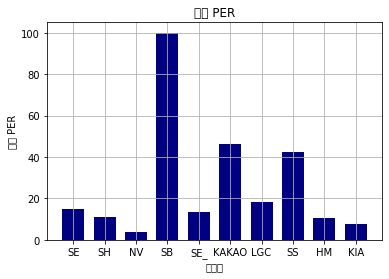

<Figure size 57600x720 with 0 Axes>

In [ ]:
plt.bar(data1['티커'][0:10],data1['현재 Per'][0:10], color = "navy", width=0.7)
plt.title('현재 PER')
plt.xlabel('종목명')
plt.ylabel('현재 PER')
plt.grid(True)

fig = plt.figure(figsize=(800,10))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_

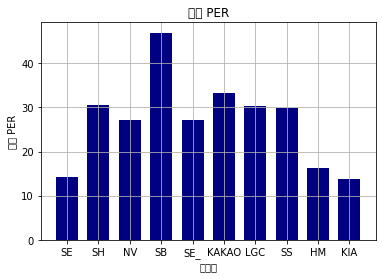

<Figure size 57600x720 with 0 Axes>

In [ ]:
plt.bar(data1['티커'][0:10],data1['적정 Per'][0:10], color = "navy", width=0.7)
plt.title('적정 PER')
plt.xlabel('종목명')
plt.ylabel('적정 PER')
plt.grid(True)

fig = plt.figure(figsize=(800,10))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_

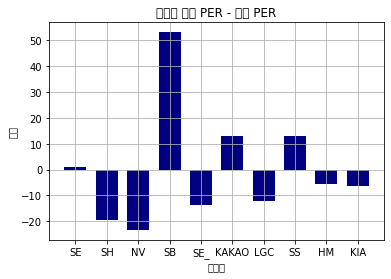

<Figure size 57600x720 with 0 Axes>

In [ ]:
plt.bar(data1['티커'][0:10],data1['차이'][0:10], color = "navy", width=0.7)
plt.title('종목별 실제 PER - 적정 PER' )
plt.xlabel('종목명')
plt.ylabel('차이')
plt.grid(True)

fig = plt.figure(figsize=(800,10))

#워드크라우드

In [ ]:
list1 = corpus["rev_token"][1000:1080]

In [ ]:
list2 = []
for i in range(1000,1000+len(list1)):
  list2 = list2 + list1[i]

list2

['예상',
 '순이익',
 '이',
 '늘',
 '어',
 '나',
 'ㄴ',
 '종목',
 '으로는',
 '리테일',
 '과',
 '엔씨소프트',
 '셀트리온',
 '과',
 '일진머티리얼즈',
 '가',
 '제시',
 '되',
 '었다',
 '두산',
 '과',
 '한화에어로스페이스',
 '한국항공우주',
 '와',
 '아이테크놀로지',
 '늘',
 'ㄴ',
 '실적',
 '개',
 '선',
 '폭',
 '이',
 '줄',
 '어',
 '든',
 '대표적',
 '이',
 'ㄴ',
 '종목',
 '으로',
 '꼽히',
 '었다',
 '한편',
 '코스닥',
 '제약',
 '지수',
 '구성',
 '종목중',
 '시가총액',
 '1위',
 '기업',
 '이',
 'ㄴ',
 '셀트리온제약',
 '는',
 '한주간',
 '1',
 '96',
 '상승',
 '마감',
 '하',
 '었고',
 '94',
 '하락',
 '코스닥시장',
 '제약',
 '지수',
 '구성종목',
 '중',
 '시가총액',
 '5',
 '셀트리온제약',
 '12만4900원',
 '1',
 '96',
 '상승',
 '씨젠',
 '11',
 '상승',
 '마감',
 '하',
 '었고',
 '시가총액',
 '2위',
 '이',
 'ㄴ',
 '셀트리온',
 '주식',
 '은',
 '1',
 '19',
 '하락',
 '마감',
 '하',
 '었다',
 '유가증권시장',
 '의약품',
 '지수',
 '25',
 '하락',
 '셀트리온',
 '20만8000원',
 '1',
 '19',
 '하락',
 '유가증권시장',
 '의약품',
 '지수',
 '구성종목',
 '중',
 '시가총액',
 '5',
 '11',
 '상승',
 '하',
 '었고',
 '시가총액',
 '2위',
 '이',
 'ㄴ',
 '셀트리온',
 '주식',
 '은',
 '1',
 '19',
 '하락',
 '하',
 '었다',
 '헬스케어',
 '구성',
 '종목',
 '중',
 '상승률',
 '5',
 '11',
 '상승',
 '셀트리온

In [ ]:
from konlpy.tag import Twitter 
from collections import Counter

In [ ]:
twitter = Twitter() 
morphs = [] 

for sentence in list2: 
    morphs.append(twitter.pos(sentence)) 
print(morphs)

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[[('예상', 'Noun')], [('순이익', 'Noun')], [('이', 'Noun')], [('늘', 'Noun')], [('어', 'Eomi')], [('나', 'Noun')], [('ㄴ', 'KoreanParticle')], [('종목', 'Noun')], [('으로는', 'Josa')], [('리테일', 'Noun')], [('과', 'Noun')], [('엔씨소프트', 'Noun')], [('셀트리온', 'Noun')], [('과', 'Noun')], [('일진', 'Noun'), ('머티리얼즈', 'Noun')], [('가', 'Verb')], [('제시', 'Noun')], [('되', 'Verb')], [('었다', 'Noun')], [('두산', 'Noun')], [('과', 'Noun')], [('한화', 'Noun'), ('에어로', 'Noun'), ('스페이스', 'Noun')], [('한국', 'Noun'), ('항공우주', 'Noun')], [('와', 'Verb')], [('아이', 'Noun'), ('테크놀로지', 'Noun')], [('늘', 'Noun')], [('ㄴ', 'KoreanParticle')], [('실적', 'Noun')], [('개', 'Noun')], [('선', 'Noun')], [('폭', 'Noun')], [('이', 'Noun')], [('줄', 'Noun')], [('어', 'Eomi')], [('든', 'Verb')], [('대표', 'Noun'), ('적', 'Suffix')], [('이', 'Noun')], [('ㄴ', 'KoreanParticle')], [('종목', 'Noun')], [('으로', 'Josa')], [('꼽히', 'Verb')], [('었다', 'Noun')], [('한편', 'Noun')], [('코스닥', 'Noun')], [('제약', 'Noun')], [('지수', 'Noun')], [('구성', 'Noun')], [('종목', 'Noun'), ('중', 'Suff

In [ ]:
noun_adj_adv_list=[] 
for sentence in morphs : 
    for word, tag in sentence : 
        if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("은"not in word)and("이"not in word)and("등"not in word)and("게"not in word)and("의"not in word)and("를"not in word)and("말"not in word): 
            noun_adj_adv_list.append(word) 

print(noun_adj_adv_list)

['예상', '늘', '종목', '리테일', '과', '엔씨소프트', '셀트리온', '과', '일진', '머티리얼즈', '제시', '었다', '두산', '과', '한화', '에어로', '한국', '항공우주', '테크놀로지', '늘', '실적', '개', '선', '폭', '줄', '대표', '종목', '었다', '한편', '코스닥', '제약', '구성', '종목', '시가총액', '위', '기업', '셀트리온', '제약', '주간', '상승', '마감', '었', '하락', '코스닥시장', '제약', '구성', '종목', '중', '시가총액', '셀트리온', '제약', '상승', '씨젠', '상승', '마감', '었', '시가총액', '위', '셀트리온', '주식', '하락', '마감', '었다', '유가', '증권', '시장', '하락', '셀트리온', '하락', '유가', '증권', '시장', '구성', '종목', '중', '시가총액', '상승', '었', '시가총액', '위', '셀트리온', '주식', '하락', '었다', '헬', '스케', '구성', '종목', '중', '상', '승률', '상승', '셀트리온', '하락', '하락', '셀트리온', '헬', '스케', '코스닥', '종목', '시가총액', '위', '기업', '셀트리온', '헬', '스케', '주간', '하락', '마감', '었', '시가총액', '하락', '코스닥', '구성', '종목', '중', '시가총액', '상위', '셀트리온', '헬', '스케', '하락', '위', '셀트리온', '제약', '원', '만', '주', '기간', '코스닥', '시장', '외국인투자', '매', '도', '상위', '위', '부터', '위', '종목', '매', '도', '금액', '과', '매', '도', '다음', '과', '위', '펄', '어비스', '원', '만', '주', '위', '엘앤', '에프', '원', '만', '주', '위', '오스', '코텍', '원', '만', '주', 

In [ ]:
count = Counter(noun_adj_adv_list)

In [ ]:
words = dict(count.most_common())

In [ ]:
!pip install WordCloud

In [ ]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords

In [ ]:
%matplotlib inline 

import matplotlib 
from matplotlib import rc
rc('font', family='NanumBarunGothic')

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    font_path = '/Library/Fonts/NanumBarunGothic.ttf',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(words)

<class 'numpy.ndarray'>
(800, 800, 3)


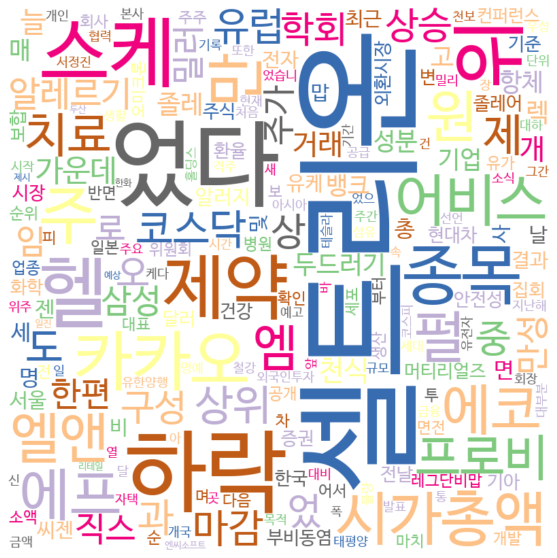

In [ ]:
array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('business_anlytics_worldcloud.png')